<a href="https://colab.research.google.com/github/AtheerMalki/Module04_ML/blob/main/heuristic_modeling/seattle_weather_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Heuristic Models
Look at the Seattle weather in the **data** folder. Come up with a heuristic model to predict if it will rain today. Keep in mind this is a time series, which means that you only know what happened historically (before a given date). One example of a heuristic model is: It will rain tomorrow if it rained more than 1 inch (>1.0 PRCP) today. 

In [ ]:
#here is an example of how to build and populate a hurestic model

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import time
import datetime

df = pd.read_csv('https://raw.githubusercontent.com/daniel-dc-cd/data_science/master/module_4_ML/data/seattle_weather_1948-2017.csv')

numrows = 25549 # can be as large as 25549

#create an empty dataframe to hold 100 values
heuristic_df = pd.DataFrame({'yesterday':[0.0]*numrows,
                             'today':[0.0]*numrows,
                             'tomorrow':[0.0]*numrows,
                             'guess':[False]*numrows, #logical guess
                             'rain_tomorrow':[False]*numrows, #historical observation
                             'correct':[False]*numrows}) #TRUE if your guess matches the historical observation

#sort columns for convience
seq = ['yesterday','today','tomorrow','guess','rain_tomorrow','correct']
heuristic_df = heuristic_df.reindex(columns=seq)

In [ ]:
df.head()

,DATE,PRCP,TMAX,TMIN,RAIN
0,1948-01-01,0.47,51,42,True
1,1948-01-02,0.59,45,36,True
2,1948-01-03,0.42,45,35,True
3,1948-01-04,0.31,45,34,True
4,1948-01-05,0.17,45,32,True


In [ ]:
heuristic_df.head()

,yesterday,today,tomorrow,guess,rain_tomorrow,correct
0,0.0,0.0,0.0,False,False,False
1,0.0,0.0,0.0,False,False,False
2,0.0,0.0,0.0,False,False,False
3,0.0,0.0,0.0,False,False,False
4,0.0,0.0,0.0,False,False,False


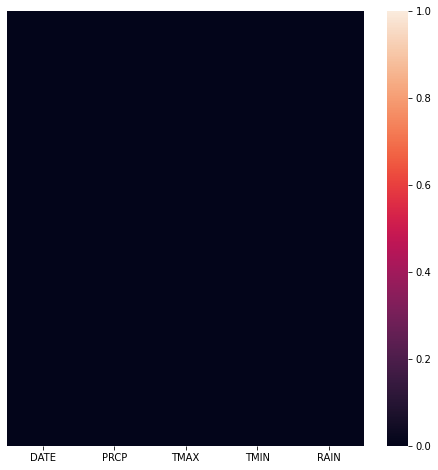

In [ ]:
plt.figure(figsize=(8,8))

sns.heatmap(pd.isnull(df),yticklabels=False)

In [ ]:
df[pd.isnull(df['PRCP'])]

,DATE,PRCP,TMAX,TMIN,RAIN
18415,1998-06-02,NaN,72,52,NaN
18416,1998-06-03,NaN,66,51,NaN
21067,2005-09-05,NaN,70,52,NaN


In [ ]:
df[pd.isnull(df['RAIN'])]

,DATE,PRCP,TMAX,TMIN,RAIN
18415,1998-06-02,NaN,72,52,NaN
18416,1998-06-03,NaN,66,51,NaN
21067,2005-09-05,NaN,70,52,NaN


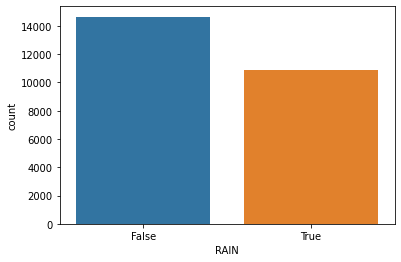

In [ ]:
sns.countplot(data=df, x='RAIN')

In [ ]:
df['PRCP'].mean()

0.10622162204477956

In [ ]:
# remove rows with null values
def RAIN_INSERTION(cols):
    RAIN=cols[0]
    if pd.isnull(RAIN):
        return 'False'
    else:
        return RAIN

In [ ]:
def PRCP_INSERTION(col):
    PRCP=col[0]
    if pd.isnull(PRCP):
        return df['PRCP'].mean()
    else:
        return PRCP

In [ ]:
df['RAIN']=df[['RAIN']].apply(RAIN_INSERTION,axis=1)

In [ ]:
df['PRCP']=df[['PRCP']].apply(PRCP_INSERTION,axis=1)

In [ ]:
df[pd.isnull(df['RAIN'])]

,DATE,PRCP,TMAX,TMIN,RAIN


In [ ]:
df[pd.isnull(df['PRCP'])]

,DATE,PRCP,TMAX,TMIN,RAIN


## EDA

Text(0.5, 1.0, 'Precipitation Vs Minimum Temperature')

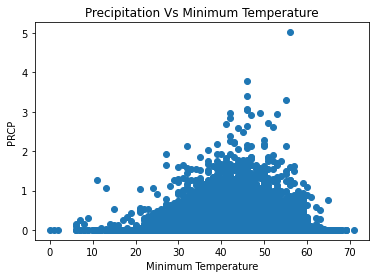

In [ ]:
plt.scatter(x='TMIN',y='PRCP',data=df)
plt.xlabel('Minimum Temperature')
plt.ylabel('PRCP')
plt.title('Precipitation Vs Minimum Temperature')

In [ ]:
plt.figure(figsize=(7,7))
plt.scatter(x='TMAX',y='PRCP',data=df)
plt.xlabel('Maximum Temperature')
plt.ylabel('PRCP')
plt.title('Precipitation Vs Maximum Temperature'

In [ ]:
sns.distplot(df['TMIN'])

In [ ]:
sns.distplot(df['TMAX'])

In [ ]:
sns.pairplot(data=df)

In [ ]:
#plt.figure(figsize=(10,7))
sns.boxplot(data=df)

In [ ]:
#Dropping the outliers from TMIN column
df=df.drop(df[df['TMIN']<17 ].index)


In [ ]:
#Dropping the outliers from TMAX columns i.e. the value more than 100
df=df.drop(df[(df['TMAX']>97.5) | (df['TMAX']< 21.5)].index)


In [ ]:
#Dropping the outliers from PRCP columns i.e. the value more than 0.275
df=df.drop(df[(df['PRCP']>0.25) | (df['PRCP']< -0.15) ].index)

In [ ]:
sns.boxplot(data=df)


# Logistic Regression Prediction

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
lr = LogisticRegression()

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X=df.drop(['RAIN','DATE'],axis=1) # features
y=df['RAIN'] # target
y=y.astype('str')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [ ]:
lr.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
prediction = lr.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
print('Confusion Matrix \n',confusion_matrix(y_test,prediction))
print('\n')
print('Classification Report \n\n',classification_report(y_test,prediction))

Confusion Matrix 
 [[4465   17]
 [ 539 2645]]


Classification Report 

               precision    recall  f1-score   support

       False       0.89      1.00      0.94      4482
        True       0.99      0.83      0.90      3184

    accuracy                           0.93      7666
   macro avg       0.94      0.91      0.92      7666
weighted avg       0.93      0.93      0.93      7666



# My Model

**If it rained yesterday >= 0.4 and did not rain today; it will rain tomorrow.**

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/daniel-dc-cd/data_science/master/module_4_ML/data/seattle_weather_1948-2017.csv')

numrows = 25549
heuristic_df = pd.DataFrame({'yesterday':[0.0]*numrows,
                             'today':[0.0]*numrows,
                             'tomorrow':[0.0]*numrows,
                             'guess':[False]*numrows, #logical guess
                             'rain_tomorrow':[False]*numrows, #historical observation
                             'correct':[False]*numrows}) #TRUE if your guess matches the historical observation

seq = ['yesterday','today','tomorrow','guess','rain_tomorrow','correct']
heuristic_df = heuristic_df.reindex(columns=seq)

In [ ]:
for x in range(numrows):
    i = x + 2

    yesterday = df.iloc[(i-2), 1]
    today = df.iloc[i-1, 1]
    tomorrow = df.iloc[(i), 1]
    rain_tomorrow = df.iloc[i,4]

    #If it rained yesterday >= 0.4 and did not rain today; it will rain tomorrow.
    if (yesterday >= 0.4 ) and (today == 0.0):
      guess = True
    else:
      guess = False

    # was the guess correct?
    if (heuristic_df.iat[x,3] == heuristic_df.iat[x,4]):
      isCorrect = True
    else:
      isCorrect = False

    #seq = ['yesterday','today','tomorrow','guess','rain_tomorrow','correct']
    heuristic_df.iat[x,0] = yesterday
    heuristic_df.iat[x,1] = today
    heuristic_df.iat[x,2] = tomorrow
    heuristic_df.iat[x,3] = guess
    heuristic_df.iat[x,4] = rain_tomorrow
    heuristic_df.iat[x,5] = isCorrect
    

In [ ]:
#pd.set_option("display.max_rows", None, "display.max_columns", None)
#print(heuristic_df)

In [ ]:
heuristic_df.head()

,yesterday,today,tomorrow,guess,rain_tomorrow,correct
0,0.47,0.59,0.42,False,True,False
1,0.59,0.42,0.31,False,True,False
2,0.42,0.31,0.17,False,True,False
3,0.31,0.17,0.44,False,True,False
4,0.17,0.44,0.41,False,True,False


In [ ]:
# Accuracy
from sklearn.metrics import accuracy_score
accuracy_score(heuristic_df['guess'], heuristic_df['rain_tomorrow'])

0.5717640612157031